# **Practice ML 3&4 DataSet**

## **Insurance Data Set:**

**Build and evaluate a multiple linear regression model using a given dataset.
Detailed breakdown of the task:
Load the dataset into a Pandas DataFrame.
Understand the variables:
Features (independent variables): age, sex, body mass index, children, smoker, region.
Target (dependent variable): medical cost.
Preprocess the data:
Convert categorical variables (sex, smoker, region) into numeric values using label encoding or one-hot encoding, since machine learning models require numeric input.
Build the multiple linear regression model.
Train the model on the dataset.
Make predictions using the model.
Evaluate the model’s performance.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"D:\Codes\MachineLearning\Datasets\insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
print(df["region"].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
# ['southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4]

mapping = { 
        "male": 1, "female": 0,
        
        "yes": 1, "no": 0,
        
        'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4
    }

df[["sex", "smoker", "region"]] = df[["sex", "smoker", "region"]].replace(mapping)

df

C:\Users\NoNeo\AppData\Local\Temp\ipykernel_5768\1116614450.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["sex", "smoker", "region"]] = df[["sex", "smoker", "region"]].replace(mapping)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


**Know we gonna check correlation coefficient.**

Age corr_coed:  0.2990081933306477
Sex corr_coed:  0.05729206220202536
Bmi corr_coed:  0.1983409688336289
Children corr_coed:  0.0679982268479048
Smoker corr_coed:  0.7872514304984772
region corr_coed:  0.00620823490944446


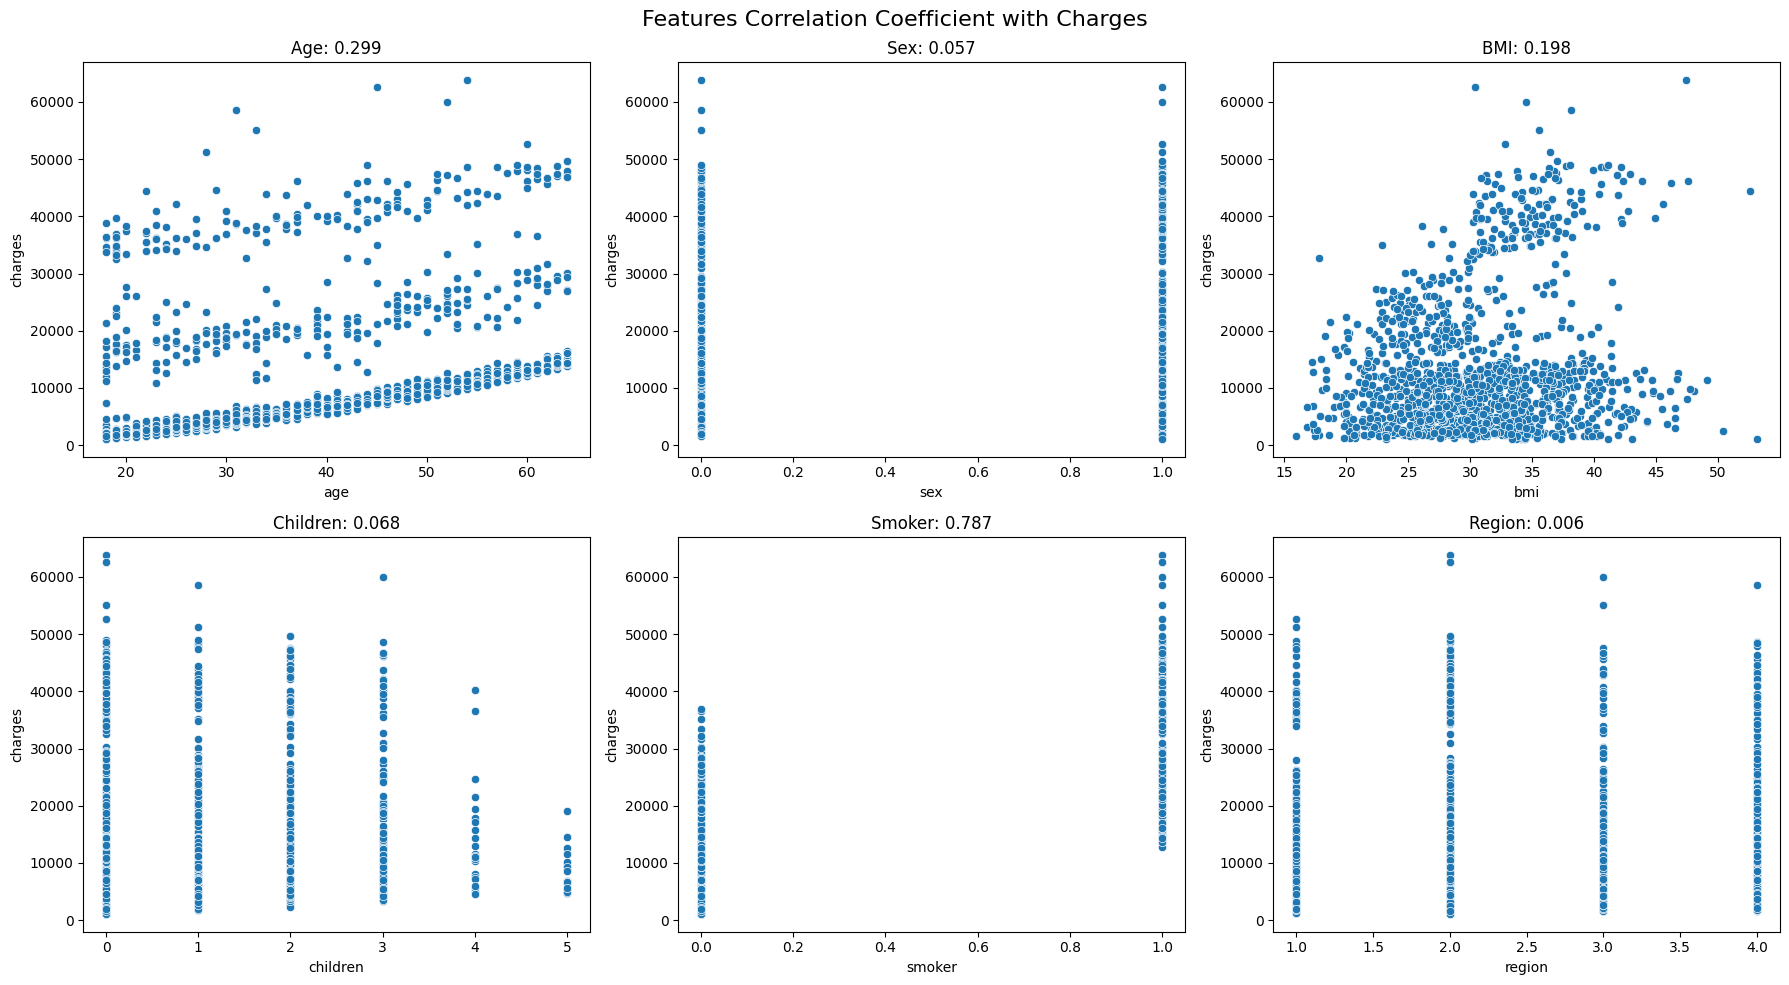

In [8]:
# age	sex	bmi	children    smoker	 region	 charges
age = np.array(df["age"])
sex = np.array(df["sex"])
bmi = np.array(df["bmi"])
children = np.array(df["children"])
smoker = np.array(df["smoker"])
region = np.array(df["region"])
y = np.array(df["charges"])

def corr_coef(x, y):
    numerator = np.sum(np.multiply(x - np.mean(x), y - np.mean(y)))
    denominator = np.multiply(np.sqrt(np.sum((x - np.mean(x))**2)), np.sqrt(np.sum((y - np.mean(y))**2)))
    corr_coef_age = numerator / denominator
    return corr_coef_age

x = age
corr_coef_age = corr_coef(x,y)
print("Age corr_coed: ", corr_coef_age)

x = sex
corr_coef_sex = corr_coef(x,y)
print("Sex corr_coed: ", corr_coef_sex)

x = bmi
corr_coef_bmi = corr_coef(x,y)
print("Bmi corr_coed: ", corr_coef_bmi)

x = children
corr_coef_children = corr_coef(x,y)
print("Children corr_coed: ", corr_coef_children)

x = smoker
corr_coef_smoker = corr_coef(x,y)
print("Smoker corr_coed: ", corr_coef_smoker)

x = region
corr_coef_region = corr_coef(x,y)
print("region corr_coed: ", corr_coef_region)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Features Correlation Coefficient with Charges', fontsize=16)

# Age vs Charges
axes[0, 0].set_title(f'Age: {corr_coef_age:.3f}')
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0, 0])

# Sex vs Charges
axes[0, 1].set_title(f'Sex: {corr_coef_sex:.3f}')
sns.scatterplot(x='sex', y='charges', data=df, ax=axes[0, 1])

# BMI vs Charges
axes[0, 2].set_title(f'BMI: {corr_coef_bmi:.3f}')
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[0, 2])

# Children vs Charges
axes[1, 0].set_title(f'Children: {corr_coef_children:.3f}')
sns.scatterplot(x='children', y='charges', data=df, ax=axes[1, 0])

# Smoker vs Charges
axes[1, 1].set_title(f'Smoker: {corr_coef_smoker:.3f}')
sns.scatterplot(x='smoker', y='charges', data=df, ax=axes[1, 1])

# Region vs Charges
axes[1, 2].set_title(f'Region: {corr_coef_region:.3f}')
sns.scatterplot(x='region', y='charges', data=df, ax=axes[1, 2])

plt.tight_layout()
plt.show()


if we look at graphs it clearly shows that age has slight positive relationship.

sex has no linear relationship

BMI (body mass index): has also slight positive relation

children  have no linear relationship 

smoke has A strong, but not perfect, positive relationship.

region has no linear relationship

In [18]:
newdf=df.drop(["sex", "children", "region"], axis=1)
newdf

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


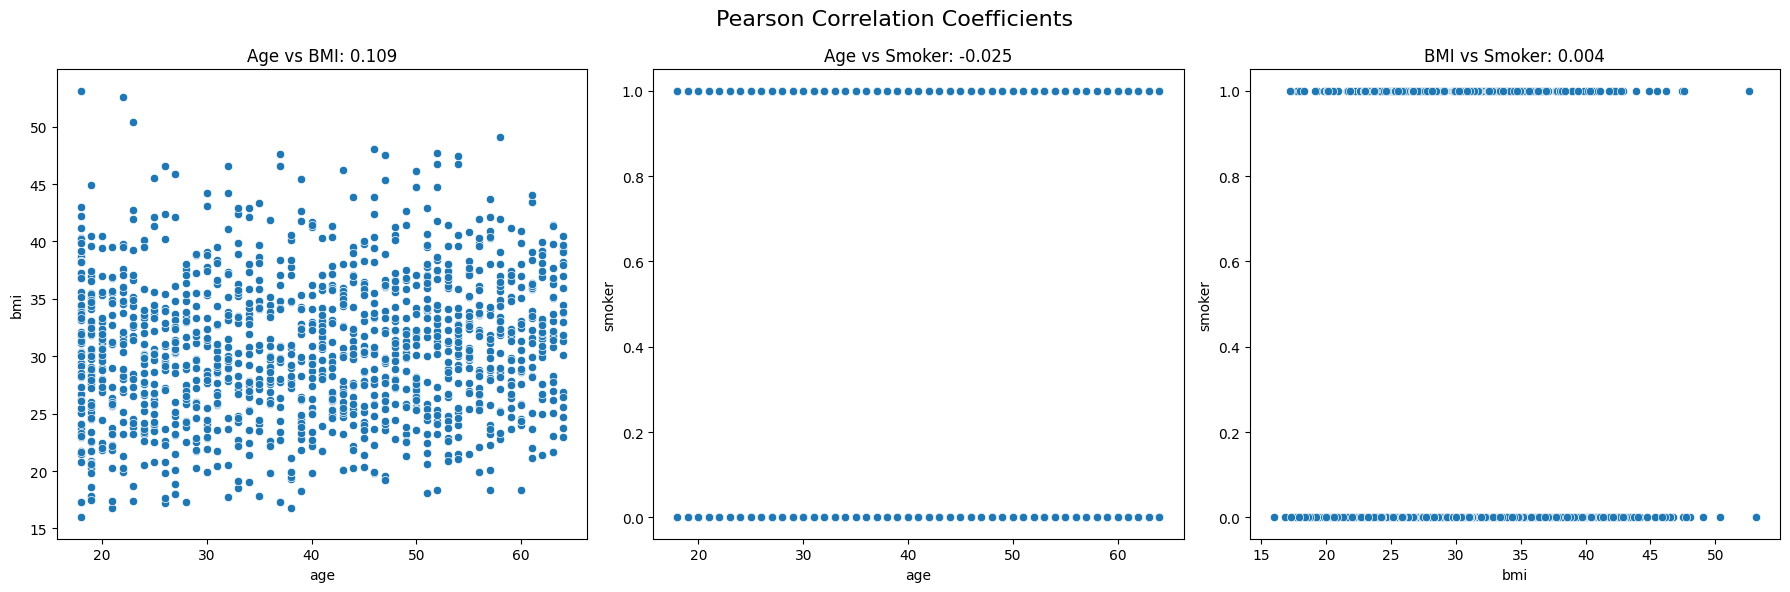

age vs bmi:  0.10927188154853516 
age vs smoker:  -0.02501875153628509 
bmi vs smoker:  0.0037504259049803623


In [22]:
x = age
y = bmi
corr_coef_age_vs_bmi = corr_coef(x,y)

x = age
y = smoker
corr_coef_age_vs_smoker = corr_coef(x,y)

x = bmi
y = smoker
corr_coef_bmi_vs_smoker = corr_coef(x,y)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Pearson Correlation Coefficients', fontsize=16)

# Age vs BMI
axes[0].set_title(f'Age vs BMI: {corr_coef_age_vs_bmi:.3f}')
sns.scatterplot(x='age', y='bmi', data=df, ax=axes[0])

# Age vs Smoker
axes[1].set_title(f'Age vs Smoker: {corr_coef_age_vs_smoker:.3f}')
sns.scatterplot(x='age', y='smoker', data=df, ax=axes[1])

# BMI vs Smoker
axes[2].set_title(f'BMI vs Smoker: {corr_coef_bmi_vs_smoker:.3f}')
sns.scatterplot(x='bmi', y='smoker', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

print("age vs bmi: ", corr_coef_age_vs_bmi, "\nage vs smoker: ", corr_coef_age_vs_smoker, "\nbmi vs smoker: ", corr_coef_bmi_vs_smoker)



**All three correlation coefficients are very close to 0, indicating no significant linear relationship between the variable pairs.**

**It means that age, BMI, and smoking status are relatively independent of each other in this dataset**

### **Create X matrix and Y Vector**

In [23]:
y = np.array(newdf["charges"])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603], shape=(1338,))

In [24]:
features = np.array(newdf.drop("charges", axis=1))
features

array([[19.  , 27.9 ,  1.  ],
       [18.  , 33.77,  0.  ],
       [28.  , 33.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  1.  ]], shape=(1338, 3))

In [28]:
X = np.insert(features, 0, 1, axis= 1)
X

array([[ 1.  , 19.  , 27.9 ,  1.  ],
       [ 1.  , 18.  , 33.77,  0.  ],
       [ 1.  , 28.  , 33.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85,  0.  ],
       [ 1.  , 21.  , 25.8 ,  0.  ],
       [ 1.  , 61.  , 29.07,  1.  ]], shape=(1338, 4))

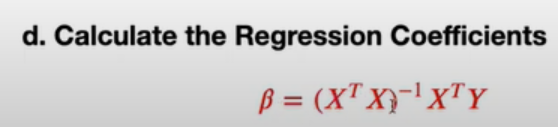

In [29]:
np.dot(X.T, X)

array([[1.33800000e+03, 5.24590000e+04, 4.10276250e+04, 2.74000000e+02],
       [5.24590000e+04, 2.32068700e+06, 1.62108858e+06, 1.05530000e+04],
       [4.10276250e+04, 1.62108858e+06, 1.30776655e+06, 8.41411500e+03],
       [2.74000000e+02, 1.05530000e+04, 8.41411500e+03, 2.74000000e+02]])

In [30]:
np.linalg.inv(np.dot(X.T, X))

array([[ 2.36832263e-02, -1.21494000e-04, -5.85880676e-04,
        -1.01244692e-03],
       [-1.21494000e-04,  3.83724508e-06, -9.66899200e-07,
         3.39602054e-06],
       [-5.85880676e-04, -9.66899200e-07,  2.03564694e-05,
        -1.99518881e-06],
       [-1.01244692e-03,  3.39602054e-06, -1.99518881e-06,
         4.59255475e-03]])

In [31]:
np.dot(X.T, y)


array([1.77558250e+07, 7.64172692e+08, 5.64037354e+08, 8.78176352e+06])

In [32]:
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

print("Beta0: {:.3f},      Beta1: {:.3f},         Beta2: {:.3f},          Beta3: {:.3f}".format(beta[0],beta[1],beta[2],beta[3]))


Beta0: -11676.830,      Beta1: 259.547,         Beta2: 322.615,          Beta3: 23823.684


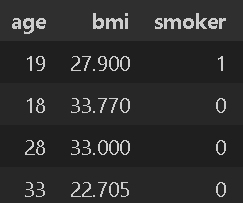

**Going to predict the charges value:**

In [ ]:
_age = 22
_smoker = 1
_bmi = 22.32
predict_value = beta[0] + (beta[1] * _age) + (beta[2] * _bmi) + (beta[3] * _smoker)
print("Pridected Value for Charges is: ",predict_value)


Pridected Value for Charges is:  25057.66864878395


In [ ]:
ybar = np.mean(y)

yhat = beta[0] + beta[1] * df["age"] + beta[2] * df["smoker"] + beta[3] * df["bmi"]

mae = np.mean(np.abs(y - yhat))
mse = np.mean((y - yhat)**2)
rmse = np.sqrt(np.mean((y - yhat)**2))
sse = np.sum((y - yhat)**2)
sst = np.sum((y - ybar)**2)
r2 = 1 - sse/sst

# Assuming 'features' is your DataFrame without the target variable ('sales' in the original context)
features = df.drop('charges', axis=1)
n = len(y)
p = features.shape[1] # Number of features

r2a = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")
print(f"Adjusted R2: {r2a:.3f}")

MAE: 715809.991
MSE: 533024225488.992
RMSE: 730085.081
R2: -3636.329
Adjusted R2: -3652.725
